<a href="https://colab.research.google.com/github/akshzlab/object-detection/blob/main/ship-detection/ship_detection_YOLOv8n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
from google.colab import userdata

api_key = userdata.get('ROBOFLOW_API_KEY')
os.environ["ROBOFLOW_API_KEY"] = api_key

In [2]:
!pip install roboflow

from roboflow import Roboflow

rf = Roboflow(api_key=api_key)
project = rf.workspace("dh-ncinm").project("ship-detection-09sak")
version = project.version(1)
dataset = version.download("yolov8")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 19.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 89.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 138.3 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.12.0.88
    Uninstalling opencv-python-headless-4.12.0.88:
      Successfully uninstalled opencv-python-headless-4.12.0.88
  Attempting uninstall: idna
    Found existing installation: idna 3.11
    Uninstalling idna-3.11:
      Successfully uninstalled idna-3.11
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to ship-detection-1 in yolov8:: 100%|██████████| 2426/2426 [00:00<00:00, 7963.07it/s]


In [3]:
!find /content -name "data.yaml"

/content/ship-detection-1/data.yaml


In [ ]:
#!unzip -o -q {dataset.location}/roboflow.zip -d {dataset.location}

In [4]:
!ls -l /content/runs/detect/train/weights/

ls: cannot access '/content/runs/detect/train/weights/': No such file or directory


In [5]:
!ls -R {dataset.location}

/content/ship-detection-1:
data.yaml  README.dataset.txt  README.roboflow.txt  test  train  valid

/content/ship-detection-1/test:
images	labels

/content/ship-detection-1/test/images:
-1095-_jpg.rf.8f40acf6d2a853cb4599147ea291ff2d.jpg
-1096-_jpg.rf.dccee58cd8d60457c39fc5876b1d4f56.jpg
-118-_jpg.rf.2fec56cb1c029d397f6ec7c4ad4203d0.jpg
-133-_jpg.rf.32d1c706246477630112f52015b78ec7.jpg
-135-_jpg.rf.5d6a9821d098d55ca6411fc73a15428e.jpg
-1377-_jpg.rf.40a86d879114c0f695ef27c76642cb8c.jpg
-1450-_jpg.rf.57ac8893e383ae46b13b6022bbb81142.jpg
-147-_jpg.rf.5f88350e85a0904fb7128b7937d8517d.jpg
-154-_jpg.rf.02004c0c68f573f231a3cab2806f40ee.jpg
-1674-_jpg.rf.024b3eafc1083c92e059633fe18063cc.jpg
-167-_jpg.rf.3a7e9e75c34ea3f50d30b98be50b99f3.jpg
-1700-_jpg.rf.fc86c9277415d76d494a82ffe65e18f7.jpg
-1705-_jpg.rf.5fba8af286dc9caf2f3989bc0bf2518c.jpg
-179-_jpg.rf.8b3947dc61c96e80f265203b57d93d83.jpg
-1809-_jpg.rf.8a13f101bf1a459ac183ad92cc473680.jpg
-1829-_jpg.rf.dd9a909dd2ae09a29479495e9d044a7b.jpg
-185-_

In [6]:
!pip install Ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 35.7 MB/s eta 0:00:00


In [7]:
from ultralytics import YOLO

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


Load the model

In [8]:
model = YOLO("yolov8n.pt")

# Display model information (optional)
model.info()

YOLOv8n summary: 129 layers, 3,157,200 parameters, 0 gradients, 8.9 GFLOPs


(129, 3157200, 0, 8.8575488)

Train the data
Loading images and labels
Key losses monitored:

Box Loss – how accurately the bounding boxes are predicted are prediction extact location of ship

Cls Loss – classification accuracy ,prediction for object class

DFL Loss(Distributed Loss Finction) – localization precision of bounding box edges control the quality of shape box

Instances -  which measure no. of object detected inside the curren training batch

P (Precision)- HOw many ships are corrected.

R (Recall) - how many ships tge model sucessfully found.



In [9]:
# Train the model on the   dataset data.yaml for 100 epochs
results = model.train(data=dataset.location + "/data.yaml", epochs=100, imgsz=640)

Ultralytics 8.3.235 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/ship-detection-1/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True

In [10]:
!find /content -name "data.yaml"

/content/ship-detection-1/data.yaml


In [11]:
!ls -R {dataset.location}

/content/ship-detection-1:
data.yaml  README.dataset.txt  README.roboflow.txt  test  train  valid

/content/ship-detection-1/test:
images	labels

/content/ship-detection-1/test/images:
-1095-_jpg.rf.8f40acf6d2a853cb4599147ea291ff2d.jpg
-1096-_jpg.rf.dccee58cd8d60457c39fc5876b1d4f56.jpg
-118-_jpg.rf.2fec56cb1c029d397f6ec7c4ad4203d0.jpg
-133-_jpg.rf.32d1c706246477630112f52015b78ec7.jpg
-135-_jpg.rf.5d6a9821d098d55ca6411fc73a15428e.jpg
-1377-_jpg.rf.40a86d879114c0f695ef27c76642cb8c.jpg
-1450-_jpg.rf.57ac8893e383ae46b13b6022bbb81142.jpg
-147-_jpg.rf.5f88350e85a0904fb7128b7937d8517d.jpg
-154-_jpg.rf.02004c0c68f573f231a3cab2806f40ee.jpg
-1674-_jpg.rf.024b3eafc1083c92e059633fe18063cc.jpg
-167-_jpg.rf.3a7e9e75c34ea3f50d30b98be50b99f3.jpg
-1700-_jpg.rf.fc86c9277415d76d494a82ffe65e18f7.jpg
-1705-_jpg.rf.5fba8af286dc9caf2f3989bc0bf2518c.jpg
-179-_jpg.rf.8b3947dc61c96e80f265203b57d93d83.jpg
-1809-_jpg.rf.8a13f101bf1a459ac183ad92cc473680.jpg
-1829-_jpg.rf.dd9a909dd2ae09a29479495e9d044a7b.jpg
-185-_


image 1/1 /content/ship-detection-1/test/images/boat157_jpg.rf.568f7de84b7e18ced533ad8346ec6d8e.jpg: 640x640 (no detections), 8.2ms
Speed: 1.8ms preprocess, 8.2ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


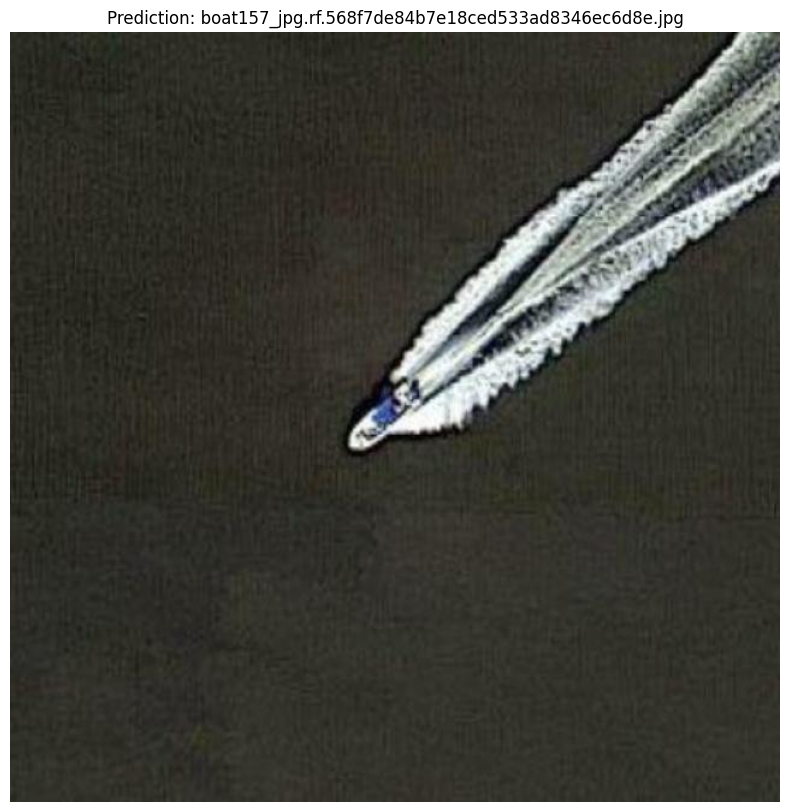


image 1/1 /content/ship-detection-1/test/images/boat447_jpg.rf.559342510d36e6a630197362d0da2ffd.jpg: 640x640 2 ships, 10.8ms
Speed: 4.6ms preprocess, 10.8ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


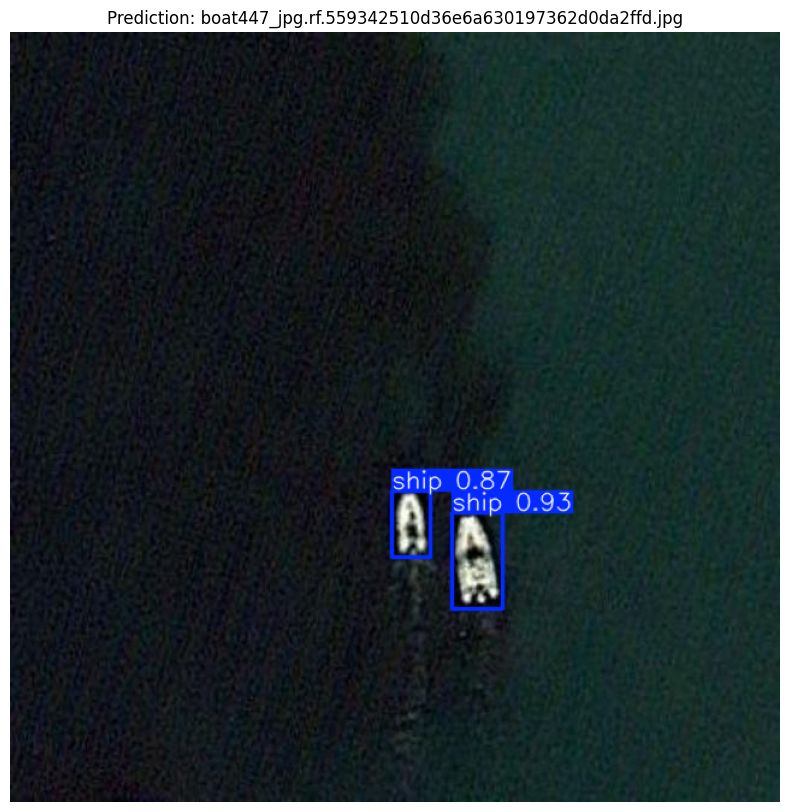


image 1/1 /content/ship-detection-1/test/images/boat620_jpg.rf.f3a7f71a7ca34e048aeaea1f34bf5e84.jpg: 640x640 1 ship, 11.6ms
Speed: 2.0ms preprocess, 11.6ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


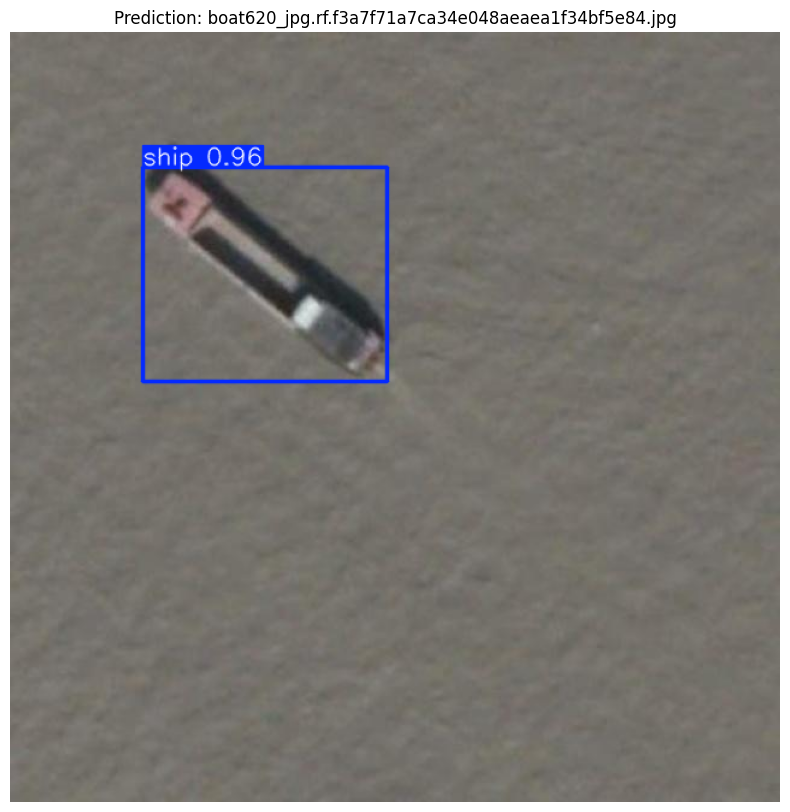


image 1/1 /content/ship-detection-1/test/images/s1010_jpg.rf.00f946cda7e997d871c612e764558269.jpg: 640x640 1 ship, 11.3ms
Speed: 2.2ms preprocess, 11.3ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


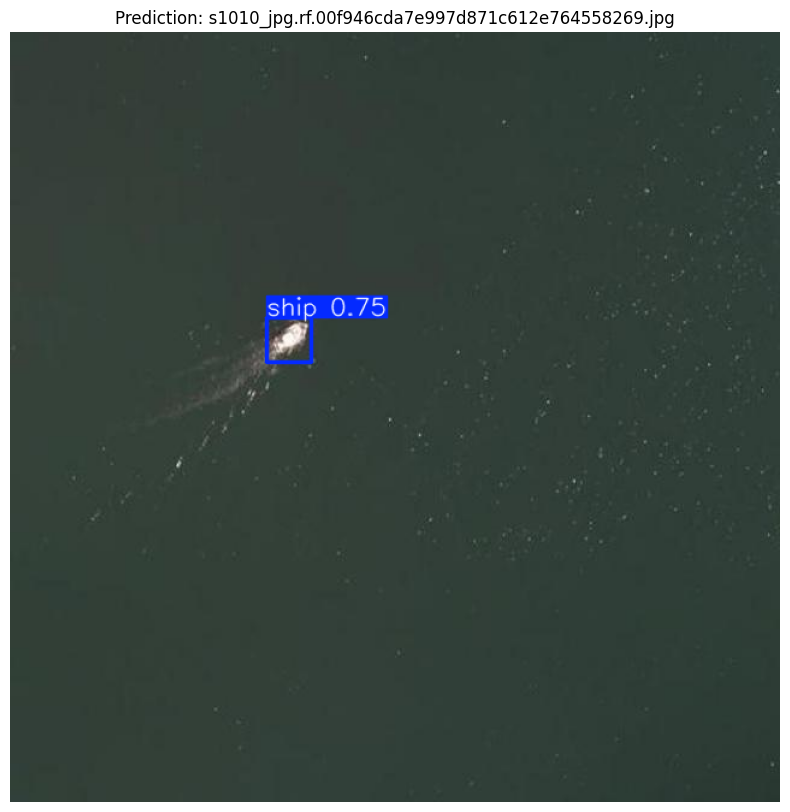


image 1/1 /content/ship-detection-1/test/images/boat535_jpg.rf.66f8034781a554bd45324ed2bd008892.jpg: 640x640 2 ships, 9.5ms
Speed: 2.3ms preprocess, 9.5ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)


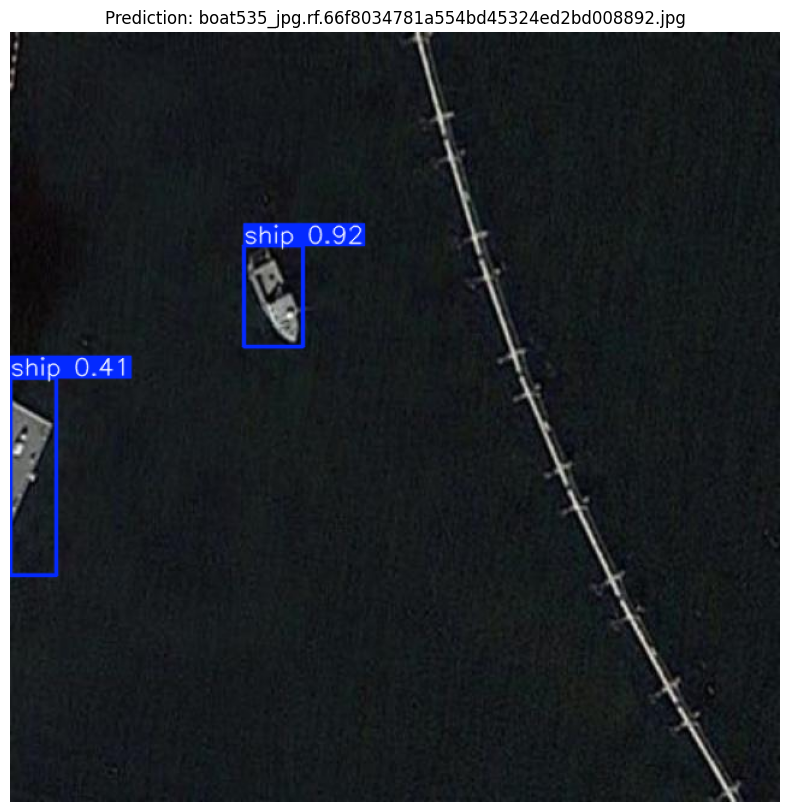


image 1/1 /content/ship-detection-1/test/images/boat109_jpg.rf.7a788971b727ab9ddc9f6fab03f25821.jpg: 640x640 1 ship, 10.1ms
Speed: 2.1ms preprocess, 10.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


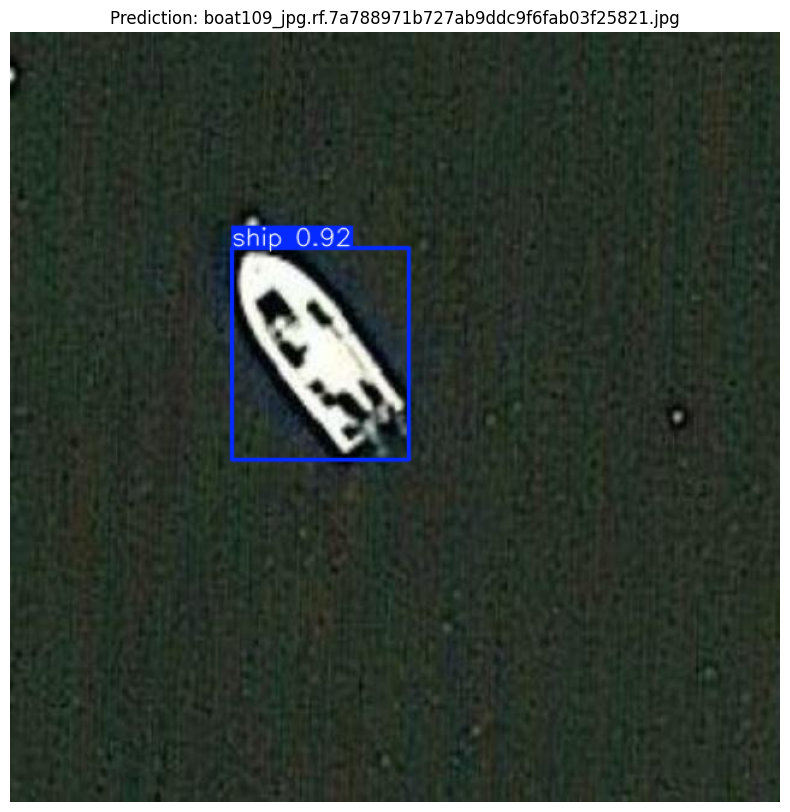


image 1/1 /content/ship-detection-1/test/images/-851-_jpg.rf.4e912bb90fd8c821acd754ed48169a2c.jpg: 640x640 1 ship, 9.5ms
Speed: 2.3ms preprocess, 9.5ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)


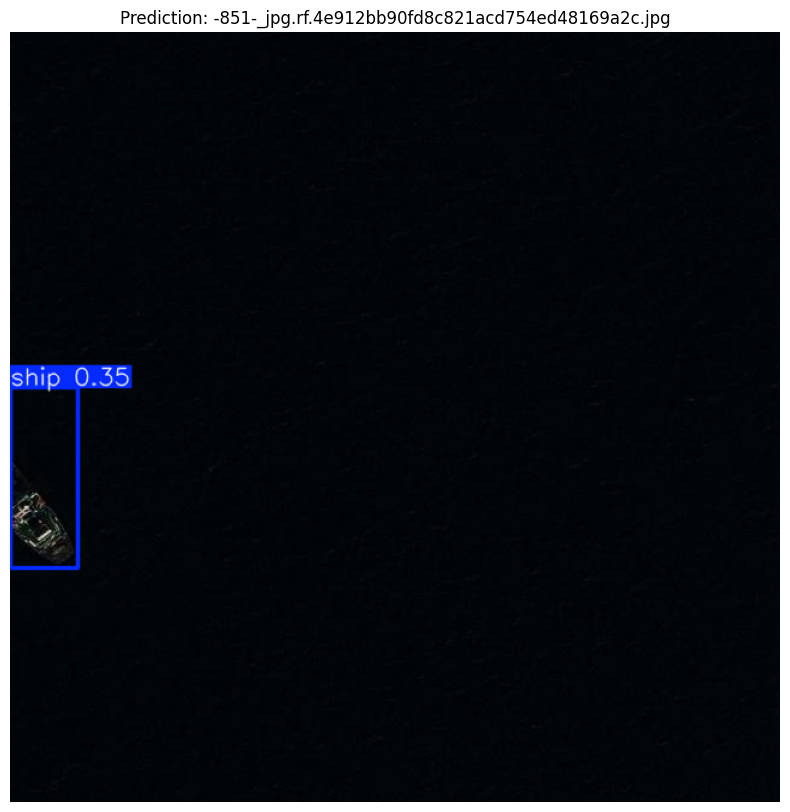


image 1/1 /content/ship-detection-1/test/images/-2638-_jpg.rf.b4a6b2434307ac037793790aa77dc32a.jpg: 640x640 3 ships, 9.7ms
Speed: 2.4ms preprocess, 9.7ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


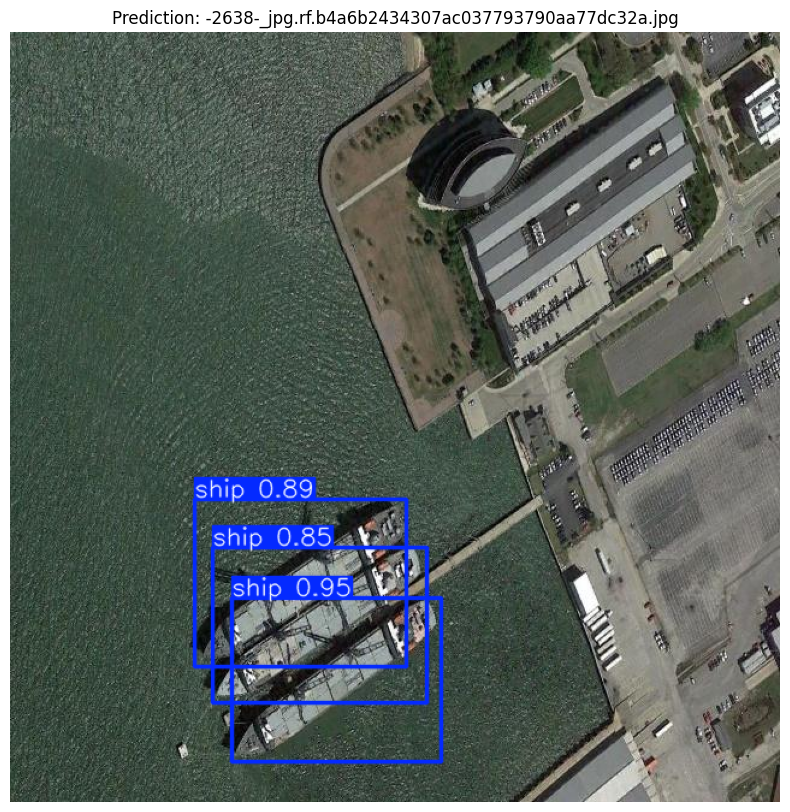


image 1/1 /content/ship-detection-1/test/images/-603-_jpg.rf.811ac78c24da7768b859b532c720f782.jpg: 640x640 10 ships, 8.5ms
Speed: 1.6ms preprocess, 8.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


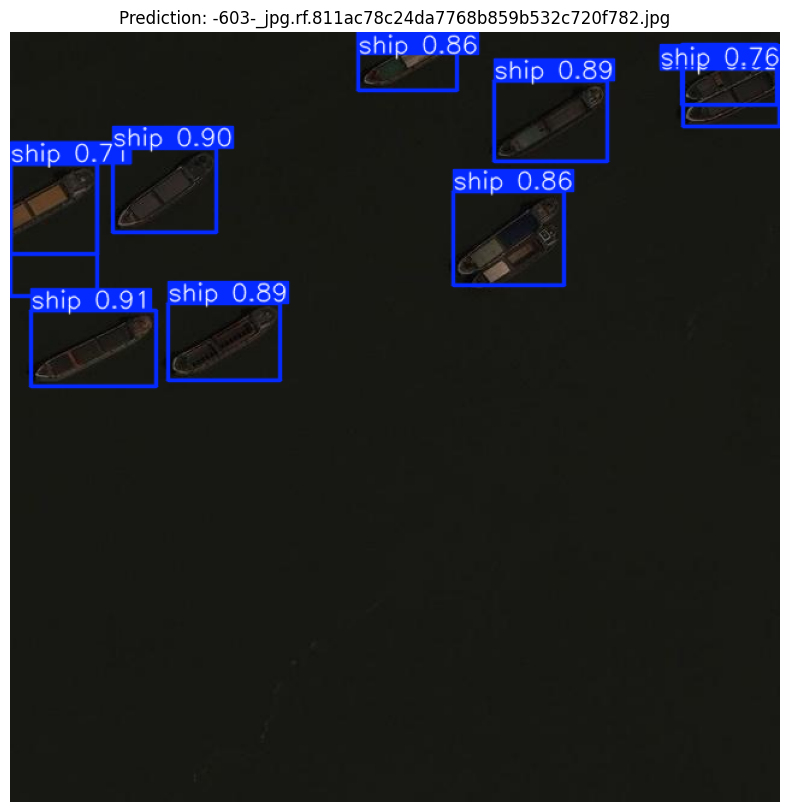


image 1/1 /content/ship-detection-1/test/images/x0829_jpg.rf.fa7c38c56c8b7d4f6cbc9ee4e3ad9a3c.jpg: 640x640 1 ship, 9.7ms
Speed: 2.2ms preprocess, 9.7ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


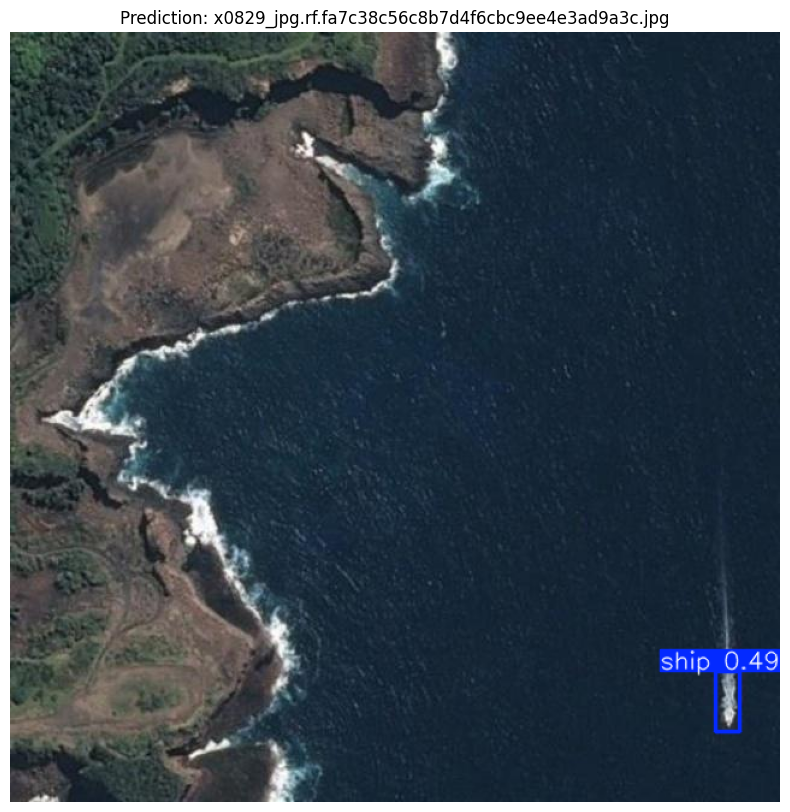

In [12]:
!pip install Ultralytics
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt
import glob
import random

# Load trained model
model = YOLO("/content/runs/detect/train/weights/best.pt")
#The best.pt file is the model checkpoint that achieved the highest mAP accuracy during training.

# Collect all test images #This model will now be used to detect ships on new unseen images.
image_paths = glob.glob("/content/ship-detection-1/test/images/*")
#These images were never used during training or validation, so they help us measure true model performance.”

# Select 10 random images # Test of the model on 10%
random_images = random.sample(image_paths, 10)
#“For each selected image, we pass it through the YOLO model.YOLO predicts ship locations, draws bounding boxes, and returns confidence scores.”

# Run predictions and display
for img_path in random_images:
    results = model(img_path)

    # Get predicted image with bounding boxes around the ship detection.
    pred_img = results[0].plot()

    # Convert BGR → RGB for matplotlib and converting image format into display
    pred_img_rgb = cv2.cvtColor(pred_img, cv2.COLOR_BGR2RGB)

    plt.figure(figsize=(10, 10))
    plt.imshow(pred_img_rgb)
    plt.axis("off")
    plt.title(f"Prediction: {img_path.split('/')[-1]}")
    plt.show()

In [ ]:
# 1. Define the path to your fresh image (uploaded to /content)
new_image_path = "/content/my_new_tree_photo.jpg"

# 2. Run the prediction
fresh_results = model(new_image_path)

# 3. Get the predicted image with bounding boxes
pred_img = fresh_results[0].plot()

# 4. Convert BGR -> RGB for matplotlib and display
import cv2
import matplotlib.pyplot as plt

pred_img_rgb = cv2.cvtColor(pred_img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10, 10))
plt.imshow(pred_img_rgb)
plt.axis("off")
plt.title("Prediction on Fresh Image")
plt.show()